# Convolutional Neural Network for Handwriting Detection

**Project:** Handwriting Detection System

**Class:** CPT_S 437 Machine Learning

**Team Members:** Molly Iverson, Caitlin Graves, Chandler Juego

## Summary

### Model Overview
A Convolutional Neural Network (CNN) is a deep learning algorithm tailored for image recognition and processing. This architecture is ideal for extracting features and classifying handwritten characters, specifically from the Rotated MNIST Dataset. It leverages convolutional layers to automatically extract spatial features, pooling layers to reduce spatial dimensions, and dense layers for final classification.


---

### Dataset

- **Source**: [MNIST Rotated Dataset](https://www.kaggle.com/code/teenakunsoth/mnist-rotated)
- **Description**: Handwritten digit images  
- **Dimensions**: 28x28 pixel grayscale images  
- **Classes**: 10 digits (0-9)  
- **Training Set Size**: 60,000 images  
- **Test Set Size**: 10,000 images  

---

## Network Architecture

- **Input Layer**: 28x28 grayscale images (reshaped to 28x28x1)  
- **Layer 1: Convolutional Layer**
  - Filters: 64  
  - Kernel Size: 3x3  
  - Activation: ReLU  
  - **Pooling**: MaxPooling with a 2x2 pool size  
- **Layer 2: Convolutional Layer**
  - Filters: 64  
  - Kernel Size: 3x3  
  - Activation: ReLU  
  - **Pooling**: MaxPooling with a 2x2 pool size  
- **Layer 3: Flattening Layer**  
  - Converts 2D feature maps to 1D feature vectors.  
- **Layer 4: Dense Layer**
  - Neurons: 64  
  - Activation: ReLU  
  - Dropout: 50% to prevent overfitting  
- **Output Layer**
  - Neurons: 10 (corresponding to the 10 digit classes: 0-9)  
  - Activation: Softmax for multi-class probability distribution.  

---

## Techniques

### Preprocessing Data
- One-Hot Encoding: Transformed labels into categorical vectors for compatibility with the categorical cross-entropy loss function.
- Pixel Normalization: Scaled pixel values from [0, 255] to [0, 1] for improved model training stability.

### Model Techniques
- **Activation Functions**  
  - **ReLU Activation**: Applied in all hidden layers to introduce non-linearity and improve gradient flow.  
  - **Softmax Activation**: Used in the output layer for probability distribution across digit classes.  
- **Dropout Regularization**  
  - Prevents overfitting by randomly dropping 50% of neurons in the dense layer during training.  
- **Pooling**: MaxPooling reduces spatial dimensions while retaining essential features, improving computational efficiency.  

### Loss Function
- **Categorical Cross-Entropy**
  - Measures prediction error for multi-class classification tasks, penalizing incorrect predictions.

### Optimization Strategies
- **Adam Optimizer**  
  - Combines adaptive learning rates with momentum, ensuring efficient and stable gradient descent.  
- **Mini-Batch Gradient Descent**  
  - Processes batches of 128 samples at a time to balance computational efficiency and training stability.  
- **Early Stopping**  
  - Monitors validation performance to halt training early, preventing overfitting.

---

## Results

- **Test Accuracy**: Achieved an accuracy of approximately 97.72% on the rotated MNIST test set after 5 epochs of training.  
- **Validation Accuracy**: Demonstrated consistent performance with minimal overfitting due to dropout regularization.

---

## Advantages of CNN for Handwriting Detection
1. **Efficient Feature Extraction**: Convolutional layers automatically learn spatial hierarchies, reducing the need for manual feature engineering.  
2. **Robust to Local Translations**: Pooling layers ensure stability across small spatial variations in input.  
3. **Scalability**: Suitable for large-scale image datasets beyond MNIST due to its efficient architecture.

---


## Data Processing


Import dependencies


In [28]:
from array import array
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import random
import struct
from tensorflow import keras

Download and process the rotated MNIST dataset

In [29]:
input_path = kagglehub.dataset_download('saiteja0101/rotated-mnist')

print('Path to dataset files:', input_path)

# File paths for Rotated MNIST
train_file = input_path + '/mnist_all_rotation_normalized_float_train_valid.amat'
test_file = input_path + '/mnist_all_rotation_normalized_float_test.amat'

# Load and preprocess the dataset
def load_amat(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # All columns except the last are features (flattened image)
    y = data[:, -1]   # The last column is the label
    return X, y

# Load training and test data
X_train, y_train = load_amat(test_file)
X_test, y_test = load_amat(train_file)

# Reshape the data to 28x28
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
Y_train = keras.utils.to_categorical(y_train, num_classes=10)
Y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

Path to dataset files: /root/.cache/kagglehub/datasets/saiteja0101/rotated-mnist/versions/1
X_train shape: (50000, 28, 28, 1), Y_train shape: (50000, 10)
X_test shape: (12000, 28, 28, 1), Y_test shape: (12000, 10)


# CNN

## Training

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42  # 10% for validation
)

# Build the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))  # Shape is (28, 28, 1) for MNIST
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolutional layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening layer and dense layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Output layer for 10 classes (digits 0-9) with softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model with a categorical cross-entropy loss
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Train with early stopping
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_val, Y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.4128 - loss: 1.6553 - val_accuracy: 0.7858 - val_loss: 0.6807
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.7110 - loss: 0.8517 - val_accuracy: 0.8698 - val_loss: 0.4414
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.7873 - loss: 0.6531 - val_accuracy: 0.9070 - val_loss: 0.3287
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.8328 - loss: 0.5272 - val_accuracy: 0.9162 - val_loss: 0.2866
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.8546 - loss: 0.4461 - val_accuracy: 0.9234 - val_loss: 0.2558


## Evaluation


In [32]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {test_acc:.8f}")

final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_accuracy:.8f}")


Test accuracy: 0.92391664
Final validation accuracy: 0.92339998


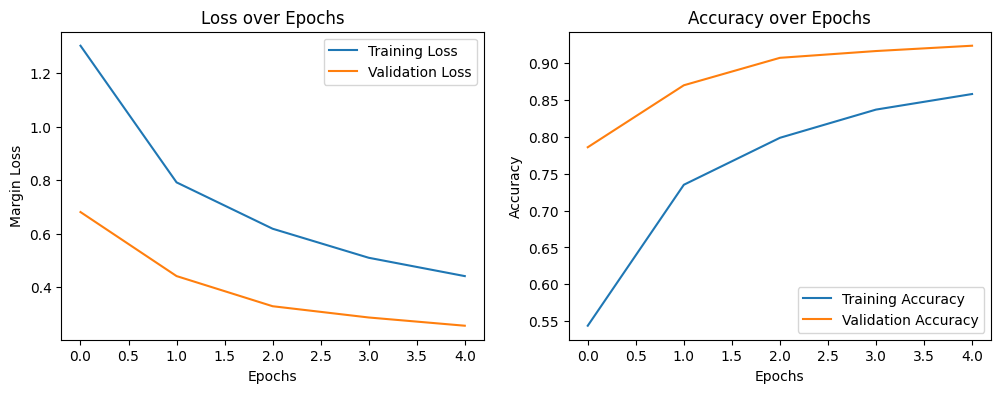

In [33]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Margin Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import classification_report

# Predict on test data
Y_pred = model.predict(X_test)

# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert one-hot encoded Y_test to class labels
Y_true = np.argmax(Y_test, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(Y_true, Y_pred_classes))

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1184
           1       0.98      0.97      0.98      1379
           2       0.91      0.91      0.91      1264
           3       0.96      0.92      0.94      1215
           4       0.94      0.92      0.93      1153
           5       0.90      0.92      0.91      1088
           6       0.89      0.89      0.89      1187
           7       0.86      0.92      0.89      1239
           8       0.95      0.93      0.94      1148
           9       0.90      0.87      0.88      1143

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



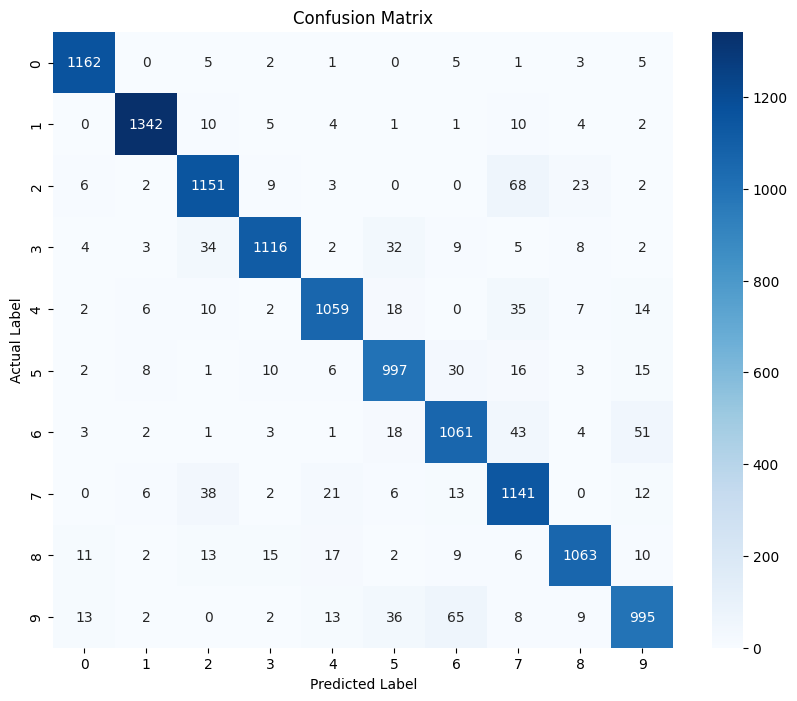

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

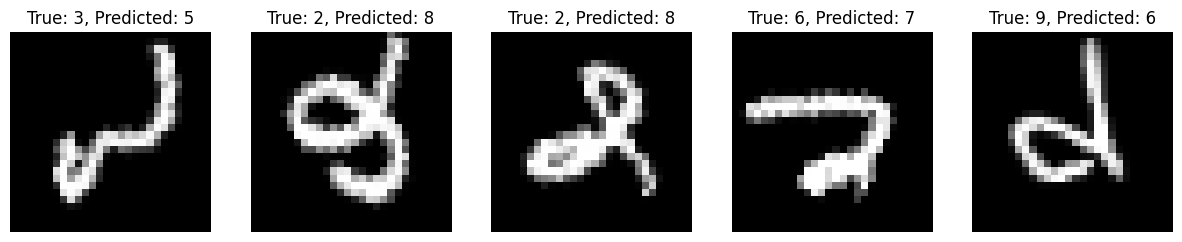

In [36]:
# Find misclassified examples
misclassified_idx = np.where(Y_pred_classes != Y_true)[0]

# Plot some misclassified examples
num_examples = 5
plt.figure(figsize=(15,15))
for i in range(num_examples):
    idx = misclassified_idx[i]
    img = X_test[idx].reshape(28,28)
    plt.subplot(1, num_examples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {Y_true[idx]}, Predicted: {Y_pred_classes[idx]}")
    plt.axis('off')
plt.show()

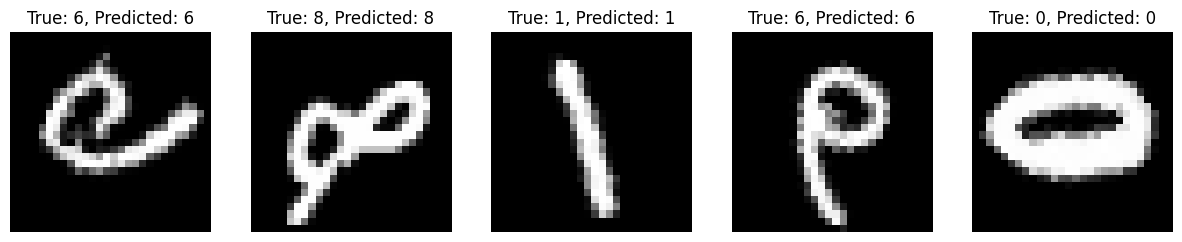

In [37]:
# Find correctly classified examples
correctly_classified_idx = np.where(Y_pred_classes == Y_true)[0]

# Plot some correctly classified examples
num_examples = 5
plt.figure(figsize=(15, 15))
for i in range(num_examples):
    idx = correctly_classified_idx[i]
    img = X_test[idx].reshape(28, 28)
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {Y_true[idx]}, Predicted: {Y_pred_classes[idx]}")
    plt.axis('off')
plt.show()